In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [253]:
print(sns.__version__)

0.10.1


In [ ]:
# GRAPHICAL EXPLORATION & CLEANING

In [2]:
df = pd.read_csv("GDP_Origin.csv")

In [3]:
# Clean NaN / null values 

df = df.dropna()
df = df.drop_duplicates(keep='first')
df['LogFxRate'] = np.log(df['FxRate'])
df['Year'] = df['Year'].astype(int)
df['LogM3'] = np.log(df['M3'])
df['LogInflatioIndx'] = np.log(df['InflatioIndx'])
df = df.drop(columns=['FxRate', 'M3', 'InflatioIndx'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 9 to 726
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cntry              555 non-null    object 
 1   LegEnvt            555 non-null    object 
 2   GeogZone1          555 non-null    object 
 3   IntalCCY           555 non-null    object 
 4   GdpGwth            555 non-null    float64
 5   Year               555 non-null    int32  
 6   OECDSTInterbkRate  555 non-null    float64
 7   LogFxRate          555 non-null    float64
 8   LogM3              555 non-null    float64
 9   LogInflatioIndx    555 non-null    float64
dtypes: float64(5), int32(1), object(4)
memory usage: 45.5+ KB


In [121]:

df.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,LogM3,LogInflatioIndx
count,555,555,555,555,555,555,555,555,555
mean,2,"2,003",17,96,4,70,1,4,5
std,3,8,48,18,4,31,2,1,0
min,-9,"1,981",0,38,-2,9,-1,2,4
25%,1,"1,997",1,86,1,44,-0,4,4
50%,2,"2,003",1,98,3,67,0,4,5
75%,4,"2,009",6,109,5,100,2,5,5
max,11,"2,015",287,149,28,147,6,5,5


In [73]:
df.head()

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,LogM3
9,Australia,Common Wealth,Asia & Pacific,AUD,2,"1,990",1,69,13,17,0,3
10,Australia,Common Wealth,Asia & Pacific,AUD,-1,"1,991",1,71,8,18,0,3
11,Australia,Common Wealth,Asia & Pacific,AUD,3,"1,992",1,72,6,19,0,3
12,Australia,Common Wealth,Asia & Pacific,AUD,4,"1,993",1,73,5,20,0,3
13,Australia,Common Wealth,Asia & Pacific,AUD,5,"1,994",1,75,7,22,0,3


In [28]:
df.dtypes

Cntry                 object
LegEnvt               object
GeogZone1             object
IntalCCY              object
GdpGwth              float64
Year                 float64
FxRate               float64
InflatioIndx         float64
OECDSTInterbkRate    float64
M3                   float64
LogFxRate            float64
dtype: object

In [24]:
df.isnull().sum()
# No more null values

df.isna().sum()
# Same for NaN values

Cntry                0
LegEnvt              0
GeogZone1            0
IntalCCY             0
GdpGwth              0
Year                 0
FxRate               0
InflatioIndx         0
OECDSTInterbkRate    0
M3                   0
LogFxRate            0
dtype: int64

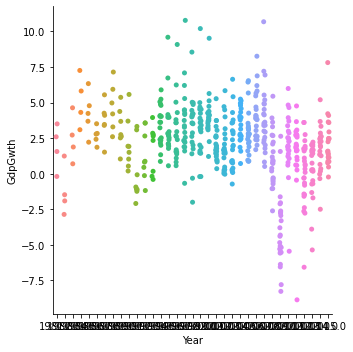

In [14]:
sns.catplot(x='Year',y='GdpGwth', data=df)
plt.show()

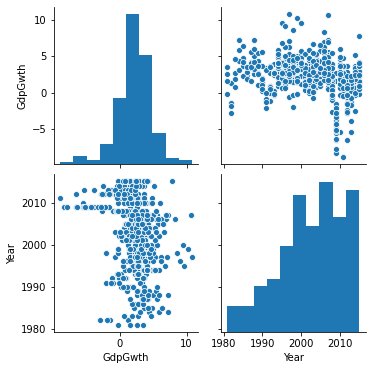

In [4]:
sns.pairplot(data=df[['GdpGwth', 'Year']])
plt.show()

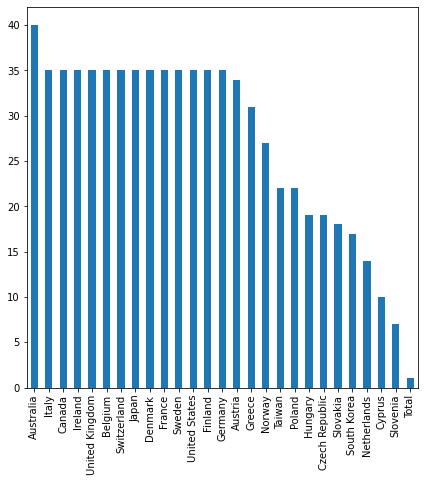

In [10]:
plt.figure(figsize=(7, 7))
df['Cntry'].value_counts().plot.bar()
plt.show()

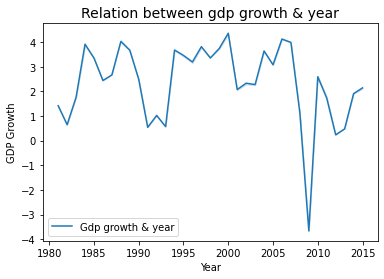

In [14]:
ax = sns.lineplot(x='Year', y='GdpGwth', label='Gdp growth & year',
 data=df, ci=False)
plt.title('Relation between gdp growth & year', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('GDP Growth')
plt.show()

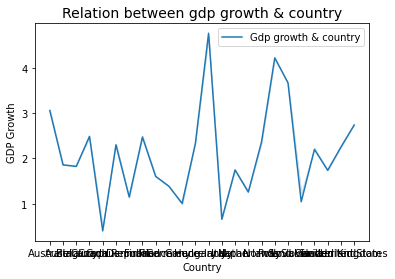

In [218]:
ax = sns.lineplot(x='Cntry', y='GdpGwth', label='Gdp growth & country',
 data=df, ci=False)
plt.title('Relation between gdp growth & country', fontsize=14)
ax.set_xlabel('Country')
ax.set_ylabel('GDP Growth')
plt.show()

[Text(0, 0.5, 'Gdp growth')]

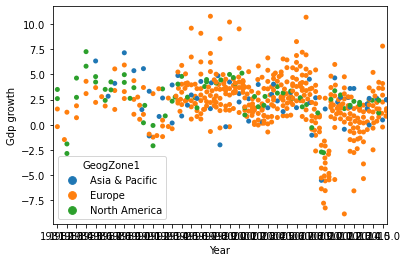

In [9]:
ax = sns.swarmplot(data=df, x="Year", y="GdpGwth", hue="GeogZone1", size=5)
ax.set(ylabel="Gdp growth")

In [7]:
sns.displot(df[['GdpGwth']])
sns.__version__

AttributeError: module 'seaborn' has no attribute 'displot'

In [10]:
# DATA CALCUL :

# - Central tendency,
# - Dispersion measure of the data set
# - Minimum, Maximum,
# - Frequency table 25%, 50%, 75%
# - Count of observations

df.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,2.206449,2002.645390,16.563639,96.587422,3.796785,70.159943
std,2.572983,8.316035,47.480355,18.243799,3.886664,31.251935
min,-8.864000,1981.000000,0.499151,37.506556,-2.000000,9.016603
25%,1.015750,1997.000000,0.772860,86.372000,0.645000,43.795695
50%,2.402000,2003.500000,1.038550,98.138000,3.090000,67.706670
75%,3.694500,2010.000000,5.581575,109.089250,5.232500,100.000000
max,10.778000,2015.000000,286.630000,149.084000,28.000000,146.704000


In [76]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,LogM3
count,555,555,555,555,555,555,555,555
mean,2,"2,003",5,5,3,69,1,4
std,2,7,9,0,3,28,1,0
min,-1,"1,991",1,4,0,30,-0,3
25%,1,"1,997",1,4,1,44,-0,4
50%,2,"2,003",1,5,3,67,0,4
75%,4,"2,009",6,5,5,100,2,5
max,5,"2,013",30,5,8,107,3,5


In [109]:
import scipy.stats as sp
df_o = pd.DataFrame()
for col in df.columns:
     df_o[col] = sp.mstats.winsorize(df[col], limits=0.1, inplace=True)
        
df_o.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,LogM3,LogInflatioIndx
count,555,555,555,555,555,555,555,555,555
mean,2,"2,003",5,97,3,69,1,4,5
std,2,7,9,15,3,28,1,0,0
min,-1,"1,991",1,72,0,30,-0,3,4
25%,1,"1,997",1,86,1,44,-0,4,4
50%,2,"2,003",1,98,3,67,0,4,5
75%,4,"2,009",6,109,5,100,2,5,5
max,5,"2,013",30,119,8,107,3,5,5


In [ ]:
sns.swarmplot(data=df_o, x="Cntry", y="Year", hue="GdpGwth", size=5)

In [6]:
df_o.head()

NameError: name 'df_o' is not defined

In [34]:
df_o['year_cat']= pd.cut(x=df['Year'], bins=[0, 1989, 1999, 2009, 2019],
 labels = ["1980-1989", "1990-1999",
 "2000-2009", "2010-2020"])

df_o.head(100)

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,year_cat
0,Belgium,Common Wealth,Asia & Pacific,CAD,2,"1,991",1,72,8,30,0,NaN
1,Belgium,Common Wealth,Asia & Pacific,CAD,-1,"1,991",1,72,8,30,0,NaN
2,Belgium,Common Wealth,Asia & Pacific,CAD,3,"1,992",1,72,6,30,0,NaN
3,Belgium,Common Wealth,Asia & Pacific,CAD,4,"1,993",1,73,5,30,0,NaN
4,Belgium,Common Wealth,Asia & Pacific,CAD,5,"1,994",1,75,7,30,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Canada,Common Wealth,North America,CAD,3,"2,006",1,102,4,74,0,NaN
96,Canada,Common Wealth,North America,CAD,2,"2,007",1,104,4,82,-0,NaN
97,Canada,Common Wealth,North America,CAD,1,"2,008",1,107,2,92,0,1990-1999
98,Canada,Common Wealth,North America,CAD,-1,"2,009",1,107,0,95,0,1990-1999


In [35]:
df_o['GdpGwth_cat']= pd.cut(x=df['GdpGwth'], bins=[-1, 0, 1, 2, 3, 4, 5, 6],
 labels = [-1, 0, 1, 2, 3, 4, 5])

df_o.head()

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,year_cat,GdpGwth_cat
0,Belgium,Common Wealth,Asia & Pacific,CAD,2,"1,991",1,72,8,30,0,NaN,NaN
1,Belgium,Common Wealth,Asia & Pacific,CAD,-1,"1,991",1,72,8,30,0,NaN,NaN
2,Belgium,Common Wealth,Asia & Pacific,CAD,3,"1,992",1,72,6,30,0,NaN,NaN
3,Belgium,Common Wealth,Asia & Pacific,CAD,4,"1,993",1,73,5,30,0,NaN,NaN
4,Belgium,Common Wealth,Asia & Pacific,CAD,5,"1,994",1,75,7,30,0,NaN,NaN


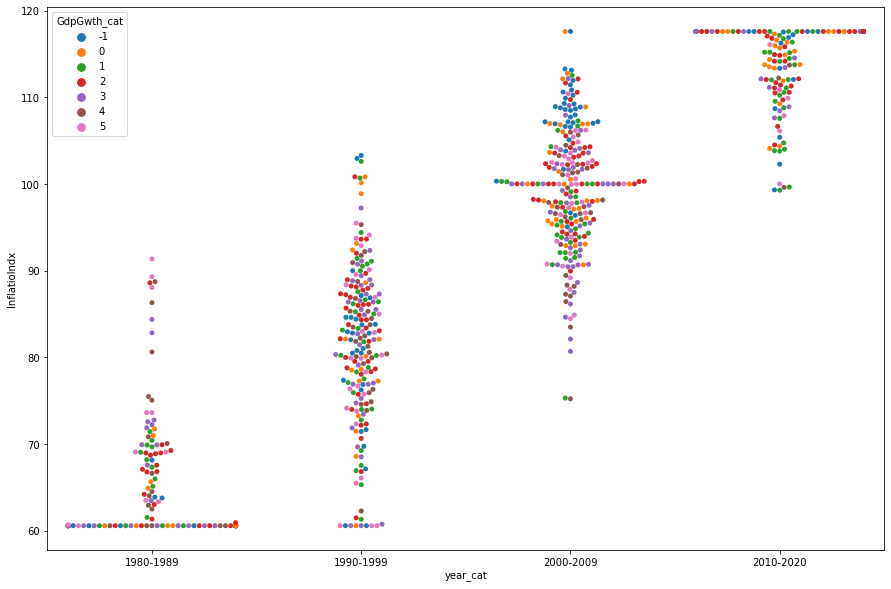

In [20]:
plt.figure(figsize=(15, 10))
sns.swarmplot(x="year_cat", y="InflatioIndx", hue='GdpGwth_cat', data=df_o)
plt.show()

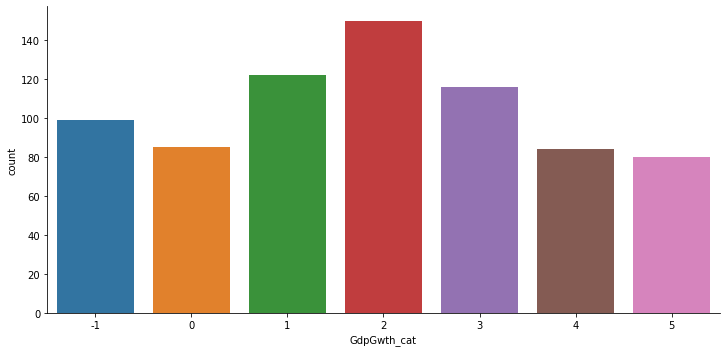

In [23]:
sns.catplot(x="GdpGwth_cat", kind="count", data=df_o, height=5, aspect=2)
plt.show()

In [36]:
# Prediction & Machine learning
df_o.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate
count,555,555,555,555,555,555,555
mean,2,"2,003",5,97,3,69,1
std,2,7,9,15,3,28,1
min,-1,"1,991",1,72,0,30,-0
25%,1,"1,997",1,86,1,44,-0
50%,2,"2,003",1,98,3,67,0
75%,4,"2,009",6,109,5,100,2
max,5,"2,013",30,119,8,107,3


In [171]:
X = df[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']]
y = df['GdpGwth']

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [172]:
y_pred = lr.predict(X)

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 -24.697687367172122
Coefficients: 
 [ 0.01643124 -0.55671055  0.00314456  0.10990379 -0.9452985 ]


In [173]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictionsFull = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                GdpGwth   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     13.59
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.63e-12
Time:                        16:57:07   Log-Likelihood:                -1282.9
No. Observations:                 555   AIC:                             2578.
Df Residuals:                     549   BIC:                             2604.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -24.6977     62.54

In [125]:
df_o.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,LogM3,LogInflatioIndx
count,555,555,555,555,555,555,555,555,555
mean,2,"2,003",5,97,3,69,1,4,5
std,2,7,9,15,3,28,1,0,0
min,-1,"1,991",1,72,0,30,-0,3,4
25%,1,"1,997",1,86,1,44,-0,4,4
50%,2,"2,003",1,98,3,67,0,4,5
75%,4,"2,009",6,109,5,100,2,5,5
max,5,"2,013",30,119,8,107,3,5,5


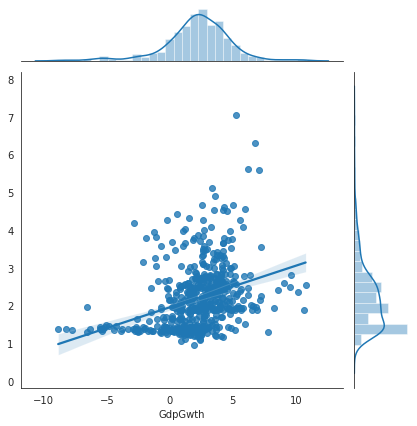

In [129]:
with sns.axes_style ('white'):
    sns.jointplot(y, y_pred, data=df_o ,kind='reg')

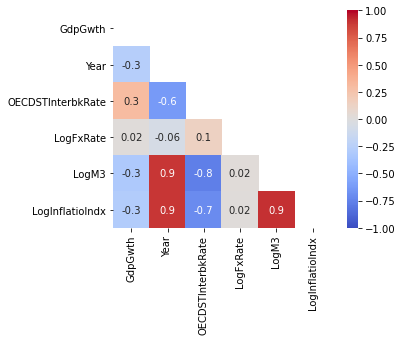

In [154]:
import numpy as np
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot= True, fmt='.1g',vmin=-1, vmax=1,center=0,cmap='coolwarm',
 square=True, mask=matrix)


In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(444, 6) (444,)
(111, 6) (111,)


In [203]:
# Fit train
Lr_train = LinearRegression()
Lr_train.fit(X_train[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']], y_train)
y_predicted_train = Lr_train.predict(
 X_train[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']])

In [204]:
print('Intercept: \n', Lr_train.intercept_)
print('Coefficients: \n', Lr_train.coef_)

Intercept: 
 -30.39296947865642
Coefficients: 
 [ 0.0202996  -0.89598221  0.05800491  0.09617303 -1.05645018]


In [210]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2_train = r2_score(y_train, y_predicted_train)
RMSE_Train = np.sqrt(mean_squared_error(y_train, y_predicted_train))
print ('R2 Train :', R2_train)
print ('RMSE Train :', RMSE_Train)

R2 Train : 0.12187776220249391
RMSE Train : 2.44051731193375


In [211]:
Lr_test = LinearRegression()
y_predicted_test = Lr_train.predict(
 X_test[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']])

In [212]:
Lr_test.fit(X_test[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']], y_test)
print('Intercept:\n', Lr_test.intercept_)
print('Coefficients:\n', Lr_test.coef_)

Intercept:
 5.503995686383725
Coefficients:
 [-5.40329006e-04 -6.61595012e-01 -1.88620071e-01  1.66128112e-01
  4.63632669e-02]


In [216]:
R2_test = r2_score(y_test, y_predicted_test)
RMSE_Test = np.sqrt(mean_squared_error(y_test, y_predicted_test))
print ('R2 Test :', R2_test)
print ('RMSE Test :', RMSE_Test)

R2 Test : 0.04433456849982109
RMSE Test : 2.4574324247790975
